In [102]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [103]:
df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\Shark_attack_dataset\archive\attacks.csv", encoding='latin1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [228]:
df.shape


(5690, 10)

**Drop entire empty rows**


In [104]:
df[df.isna().sum(axis=1)==df.shape[1]]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.dropna(how="all",inplace=True) # how="all", 'cause the default is how="any", but i only want to drop the ENTIRELY empty rows ## inplace=True, 'cause i want to save the alterations, overwriting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   obje

**Duplicates**


In [106]:
df.duplicated().sum()

2392

In [107]:
df[df.duplicated()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df.drop_duplicates(ignore_index=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

**Drop column which we don't need for analysis**

In [109]:

df.drop(columns=['Unnamed: 22','Unnamed: 23','Case Number.1','Case Number.2', 'pdf', 'href formula','href'], inplace=True)

**Standardize columns**

In [110]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.rename(columns={'sex_': 'sex', 'species_': 'species'}, inplace=True)
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,6299.0


**dtypes**

In [111]:
df.dtypes

case_number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex                        object
age                        object
injury                     object
fatal_(y/n)                object
time                       object
species                    object
investigator_or_source     object
original_order            float64
dtype: object

In [112]:
df.describe()

,year,original_order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [113]:
df.describe(include="object")

,case_number,date,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source
count,6310,6302,6298,6252,5847,5762,5758,6092,5737,3471,6274,5763,2948,3464,6285
unique,6287,5433,8,212,825,4108,1532,5230,6,157,3737,8,366,1549,4969
top,0,1957,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,FATAL,N,Afternoon,White shark,"C. Moore, GSAF"
freq,8,11,4595,2229,1037,163,971,550,5094,154,802,4293,187,163,105


In [114]:
[display(df[col].value_counts(dropna=False)) for col in df.columns if df[col].nunique() <= 20]

type
Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
NaN               13
Questionable       2
Boatomg            1
Name: count, dtype: int64

sex
M      5094
F       637
NaN     574
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

fatal_(y/n)
N          4293
Y          1388
NaN         548
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

[None, None, None]

In [115]:
df["sex"].value_counts(dropna=False)

sex
M      5094
F       637
NaN     574
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [116]:
df["sex"].fillna("M", inplace=True)
df["sex"].replace({"M ":"M","N":"M", "lli":"M",".":"M"}, inplace=True)
df["sex"].value_counts(dropna=False)

sex
M    5674
F     637
Name: count, dtype: int64

In [117]:
df["type"].fillna("Unprovoked", inplace=True)
df["type"].replace({"Boat":"Boating","Boatomg":"Boating"}, inplace=True)
df["type"].value_counts(dropna=False)

type
Unprovoked      4608
Provoked         574
Invalid          547
Boating          341
Sea Disaster     239
Questionable       2
Name: count, dtype: int64

In [118]:
df["fatal_(y/n)"].fillna("UNKNOWN", inplace=True)
df["fatal_(y/n)"].replace({" N":"N","N ":"N", "y":"Y","M":"UNKNOWN","2017":"UNKNOWN"}, inplace=True)
df["fatal_(y/n)"].value_counts(dropna=False)

fatal_(y/n)
N          4301
Y          1389
UNKNOWN     621
Name: count, dtype: int64

In [119]:
df.isna().sum()

case_number                  1
date                         9
year                        11
type                         0
country                     59
area                       464
location                   549
activity                   553
name                       219
sex                          0
age                       2840
injury                      37
fatal_(y/n)                  0
time                      3363
species                   2847
investigator_or_source      26
original_order               2
dtype: int64

In [120]:
df["country"].fillna("USA", inplace=True)
df["country"].value_counts(dropna=False)

country
USA                       2288
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: count, Length: 212, dtype: int64

In [121]:
!pip install pycountry
import pycountry


In [122]:
manual_mapping = {
    'United States': 'USA'
}

# Функция для получения ISO-кода страны с учетом ручного соответствия
def get_country_code(country_name):
    if country_name in manual_mapping:
        return manual_mapping[country_name]
    country = pycountry.countries.get(name=country_name)
    if country:
        return country.alpha_3
    else:
        return None

# Применение функции к DataFrame
df['iso_code'] = df['country'].apply(get_country_code)

In [123]:
df['iso_code'].fillna('US', inplace=True)
df['iso_code'].value_counts(dropna=False)

iso_code
US     2703
AUS    1338
ZAF     579
PNG     134
NZL     128
       ... 
BGD       1
AGO       1
ABW       1
PRI       1
DJI       1
Name: count, Length: 109, dtype: int64

In [124]:
df["area"].fillna("Florida", inplace=True)
df["area"].value_counts(dropna=False)

area
Florida                                 1501
New South Wales                          486
Queensland                               311
Hawaii                                   298
California                               290
                                        ... 
Ysabel Island                              1
 Lau Province                              1
South Coast, East New Britain              1
Between Southampton & Canary Islands       1
Moala Island                               1
Name: count, Length: 825, dtype: int64

In [125]:
df["location"].fillna("New Smyrna Beach, Volusia County", inplace=True)
df["location"].value_counts(dropna=False)

location
New Smyrna Beach, Volusia County                  712
Daytona Beach, Volusia County                      30
Ponce Inlet, Volusia County                        20
Melbourne Beach, Brevard County                    18
Myrtle Beach, Horry County                         17
                                                 ... 
Whale Beach                                         1
l'Anse-Vata                                         1
Hole-in-the Wall                                    1
Wreck of the Navy Barge, 22 miles SE of Rudee       1
Below the English fort, Trincomalee                 1
Name: count, Length: 4108, dtype: int64

In [126]:
df["activity"].fillna("Surfing", inplace=True)

In [127]:
replacements = {
    'Surfing': r'^.*Surfing.*$',
    'Swimming': r'^.*Swimming.*$',
    'Fishing': r'^.*Fishing.*$',
    'Bathing': r'^.*Bathing.*$',
    'Diving': r'^.*Diving.*$',
    'Wading': r'^.*Wading.*$',
    'Standing': r'^.*Standing.*$',
    'Snorkeling': r'^.*Snorkeling.*$',
    'Swimming': r'^.*Swimming.*$',
    'Kayaking': r'^.*Kayaking.*$',
    'Fell overboard': r'^.*Fell overboard.*$',
    'Walking': r'^.*Walking.*$',
    'Floating': r'^.*Floating.*$',
    # Add other replacements for body parts as needed
}

# Iterate through the replacements and apply them to the DataFrame
for replacement, pattern in replacements.items():
    df['activity'] = df['activity'].replace(to_replace=pattern, value=replacement, regex=True)

# Display the modified DataFrame
print(df['activity'].value_counts())

activity
Surfing                                 1579
Swimming                                1076
Fishing                                  633
Spearfishing                             333
Diving                                   239
                                        ... 
Free diving, carrying speargun             1
Hunting crayfish                           1
Netting sharks                             1
Lobster diving using Scuba                 1
Wreck of  large double sailing canoe       1
Name: count, Length: 1024, dtype: int64


In [128]:
threshold = 10  
activity_counts = df['activity'].value_counts()
rare_activities = activity_counts[activity_counts < threshold].index.tolist()


df['activity'].replace(rare_activities, 'Other', inplace=True)

In [129]:
df["activity"].value_counts(dropna=False)

activity
Surfing            1579
Other              1278
Swimming           1076
Fishing             633
Spearfishing        333
Diving              239
Bathing             184
Wading              166
Standing            127
Snorkeling           94
Scuba diving         76
Body boarding        61
Fell overboard       54
Body surfing         49
Floating             46
Kayaking             37
Treading water       32
Pearl diving         32
Boogie boarding      29
Free diving          29
Walking              26
Windsurfing          19
Boogie Boarding      16
Shark fishing        15
Canoeing             13
Surf fishing         12
Surf-skiing          12
Rowing               12
Surf skiing          12
Freediving           10
Sponge diving        10
Name: count, dtype: int64

In [130]:
df['activity'] = df['activity'].replace({"Spearfishing":"Fishing","Scuba diving":"Diving","Body surfing":"Surfing", "Pearl diving ":"Diving", "Shark fishing":"Fishing", "Freediving":"Diving","Sponge diving":"Diving","Surf skiing":"Surf-skiing", "Body boarding":"Boarding", "Boogie boarding":"Boarding", "Boogie Boarding":"Boarding"})
df["activity"].value_counts(dropna=False)

activity
Surfing           1628
Other             1278
Swimming          1076
Fishing            981
Diving             335
Bathing            184
Wading             166
Standing           127
Boarding           106
Snorkeling          94
Fell overboard      54
Floating            46
Kayaking            37
Treading water      32
Pearl diving        32
Free diving         29
Walking             26
Surf-skiing         24
Windsurfing         19
Canoeing            13
Surf fishing        12
Rowing              12
Name: count, dtype: int64

In [131]:
df['activity'] = df['activity'].replace({"Pearl diving":"Diving","Scuba diving":"Diving","Surf fishing":"Fishing", "Kayaking":"Boating", "Canoeing":"Boating", "Floating":"Swimming","Bathing":"Swimming","Windsurfing":"Surfing"})
df["activity"].value_counts(dropna=False)

activity
Surfing           1647
Swimming          1306
Other             1278
Fishing            993
Diving             367
Wading             166
Standing           127
Boarding           106
Snorkeling          94
Fell overboard      54
Boating             50
Treading water      32
Free diving         29
Walking             26
Surf-skiing         24
Rowing              12
Name: count, dtype: int64

In [132]:
category_mapping = {
    'Surfing': 'Water Sports',
    'Swimming': 'Water Sports',
    'Fishing': 'Water Activities',
    'Diving': 'Water Activities',
    'Wading': 'Water Activities',
    'Standing': 'Stationary',
    'Boarding': 'Water Activities',
    'Snorkeling': 'Water Activities',
    'Fell overboard': 'Accidents',
    'Boating': 'Water Activities',
    'Treading water': 'Water Activities',
    'Free diving': 'Water Activities',
    'Walking': 'Land Activities',
    'Surf-skiing': 'Water Sports',
    'Rowing': 'Water Activities',
    'Other': 'Other'
}

# Заменяем категории в DataFrame с помощью словаря
df['activity'] = df['activity'].map(category_mapping)

# Подсчитываем количество в каждой категории
activity_counts = df['activity'].value_counts()
print(activity_counts)

activity
Water Sports        2977
Water Activities    1849
Other               1278
Stationary           127
Accidents             54
Land Activities       26
Name: count, dtype: int64


In [133]:
df["name"].fillna("Unknown", inplace=True)
df['name'] = df['name'].replace(to_replace={'male': 'male', r'^(?!.*female).*male.*$': 'male'}, regex=True)
df['name'] = df['name'].replace({"Anonymous":"Unknown","unknown":"Unknown","2 males":"male", "boy":"children","girl":"children"})
df['name'] = df['name'].replace({"Unidentified":"Unknown","a sailor":"sailor","child":"children", "woman":"female","2 women":"female"})
df['name'] = df['name'].replace({"Arab boy":"children","native boy":"children","Fijian girl":"children", "2 men":"male", "teen":"children"})
df["name"].value_counts(dropna=False)

name
male                                                                    691
Unknown                                                                 242
female                                                                  103
children                                                                 53
sailor                                                                   18
                                                                       ... 
Adam                                                                      1
Severed human foot washed ashore (in sneaker with 2 Velcro closures)      1
3 people                                                                  1
Brian Alcorn                                                              1
Jules Patterson                                                           1
Name: count, Length: 5118, dtype: int64

In [134]:
df['injury'].fillna("FATAL", inplace=True)
df['injury'].value_counts(dropna=False)

injury
FATAL                                                                                     839
Survived                                                                                   97
Foot bitten                                                                                87
No injury                                                                                  82
Leg bitten                                                                                 72
                                                                                         ... 
Cut foot, but injury caused by fishing line, not the shark                                  1
Left foot bitten after he accidentally stepped on the shark         PROVOKED INCIDENT       1
2 puncture wounds in left leg                                                               1
PROVOKED INCIDENT    Knee bitten by shark trapped in net                                    1
FATAL. "Shark bit him in half, carrying away the lowe

In [135]:
replacements = {
    'FATAL': r'^.*FATAL.*$',
    'Survived': r'^.*Survived.*$',
    'Foot bitten': r'^.*Foot bitten.*$',
    'No injury': r'^.*No injury.*$',
    'Leg bitten': r'^.*Leg.*$',
    'Ankle bitten': r'^.*Ankle.*$',
    'Wrist bitten': r'^.*Wrist.*$',
    'Hand bitten': r'^.*Hand.*$',
    
    # Add other replacements for body parts as needed
}

# Iterate through the replacements and apply them to the DataFrame
for replacement, pattern in replacements.items():
    df['injury'] = df['injury'].replace(to_replace=pattern, value=replacement, regex=True)

# Display the modified DataFrame
print(df['injury'].value_counts())

injury
FATAL                                                                                                                                                                                  1369
No injury                                                                                                                                                                               752
Leg bitten                                                                                                                                                                              233
Survived                                                                                                                                                                                105
Hand bitten                                                                                                                                                                             105
                                                     

In [136]:
threshold = 10  
activity_counts = df['injury'].value_counts()
rare_activities = activity_counts[activity_counts < threshold].index.tolist()


df['injury'].replace(rare_activities, 'Other', inplace=True)
df['injury'].value_counts()

injury
Other                        3111
FATAL                        1369
No injury                     752
Leg bitten                    233
Hand bitten                   105
Survived                      105
Foot bitten                   104
Left foot bitten               50
Ankle bitten                   45
No details                     43
Right foot bitten              39
Thigh bitten                   27
Calf bitten                    22
Minor injury                   22
Foot lacerated                 21
Lacerations to foot            20
Right leg bitten               20
Arm bitten                     20
Lacerations to right foot      18
Lacerations to left foot       18
Right calf bitten              16
Minor injuries                 14
Heel bitten                    14
Left arm bitten                13
Foot severed                   13
Left leg bitten                13
Right thigh bitten             12
Left calf bitten               11
Lacerations to leg             11
Lacerat

In [137]:
df['injury'].replace('Leg bitten bitten', 'Leg bitten', inplace = True)
df['injury'].value_counts()

injury
Other                        3111
FATAL                        1369
No injury                     752
Leg bitten                    233
Hand bitten                   105
Survived                      105
Foot bitten                   104
Left foot bitten               50
Ankle bitten                   45
No details                     43
Right foot bitten              39
Thigh bitten                   27
Calf bitten                    22
Minor injury                   22
Foot lacerated                 21
Lacerations to foot            20
Right leg bitten               20
Arm bitten                     20
Lacerations to right foot      18
Lacerations to left foot       18
Right calf bitten              16
Minor injuries                 14
Heel bitten                    14
Left arm bitten                13
Foot severed                   13
Left leg bitten                13
Right thigh bitten             12
Left calf bitten               11
Lacerations to leg             11
Lacerat

In [138]:

df['injury'] = df['injury'].replace({"Left foot bitten":"Foot bitten","Right foot bitten":"Foot bitten","Thigh bitten":"Leg bitten", "Calf bitten":"Leg bitten", "Right leg bitten":"Leg bitten", "Ankle bitten bitten":"Leg bitten","Right calf bitten":"Leg bitten", "Left leg bitten":"Leg bitten","Leg bitten injured":"Leg bitten","Right thigh bitten":"Leg bitten","Left calf bitten":"Leg bitten", "Legs bitten":"Leg bitten"})
df['injury'].value_counts()

injury
Other                        3111
FATAL                        1369
No injury                     752
Leg bitten                    354
Foot bitten                   193
Survived                      105
Hand bitten                   105
Ankle bitten                   45
No details                     43
Minor injury                   22
Foot lacerated                 21
Lacerations to foot            20
Arm bitten                     20
Lacerations to right foot      18
Lacerations to left foot       18
Minor injuries                 14
Heel bitten                    14
Foot severed                   13
Left arm bitten                13
Lacerations to leg             11
Laceration to left foot        10
Lacerations to right leg       10
Lacerations to right hand      10
Lacerations to lower leg       10
Thigh lacerated                10
Name: count, dtype: int64

In [139]:
df['injury'] = df['injury'].replace({"Hand bitten bitten":"Hand bitten","Left arm bitten":"Arm bitten","Foot lacerated":"Lacerations to foot", "Lacerations to right foot":"Lacerations to foot", "Lacerations to left foot":"Lacerations to foot", "Leg bitten lacerated":"Lacerations to leg","Lacerations to right leg":"Lacerations to leg", "Laceration to left foot":"Lacerations to leg","Lacerations to lower leg":"Lacerations to leg","Thigh lacerated":"Lacerations to leg"})
df['injury'].value_counts()

injury
Other                        3111
FATAL                        1369
No injury                     752
Leg bitten                    354
Foot bitten                   193
Survived                      105
Hand bitten                   105
Lacerations to foot            77
Lacerations to leg             51
Ankle bitten                   45
No details                     43
Arm bitten                     33
Minor injury                   22
Minor injuries                 14
Heel bitten                    14
Foot severed                   13
Lacerations to right hand      10
Name: count, dtype: int64

In [140]:
df['injury'] = df['injury'].replace({"Heel bitten":"Foot bitten","Lacerations to right hand":"Lacerations to  hand"})
df['injury'].value_counts()

injury
Other                   3111
FATAL                   1369
No injury                752
Leg bitten               354
Foot bitten              207
Hand bitten              105
Survived                 105
Lacerations to foot       77
Lacerations to leg        51
Ankle bitten              45
No details                43
Arm bitten                33
Minor injury              22
Minor injuries            14
Foot severed              13
Lacerations to  hand      10
Name: count, dtype: int64

In [141]:
df['injury'] = df['injury'].replace({"Leg bitten":"Lower extremity bitten","Foot bitten":"Lower extremity bitten", "Arm bitten":"Upper extremity bitten","Hand bitten":"Upper extremity bitten", "Lacerations to foot":"Lacerations to lower extremity bitten","Lacerations to leg":"Lacerations to lower extremity bitten", "Lacerations to  hand":"Lacerations to upper extremity bitten","Foot severed":"Lower extremity severed", "Leg bitten severed":"Lower extremity severed", "Minor injury":"Minor injuries"})
df['injury'].value_counts()

injury
Other                                    3111
FATAL                                    1369
No injury                                 752
Lower extremity bitten                    561
Upper extremity bitten                    138
Lacerations to lower extremity bitten     128
Survived                                  105
Ankle bitten                               45
No details                                 43
Minor injuries                             36
Lower extremity severed                    13
Lacerations to upper extremity bitten      10
Name: count, dtype: int64

In [142]:
category_mapping = {
    'Lower extremity bitten': 'Lower extremity injury',
    'Lacerations to lower extremity bitten': 'Lower extremity injury',
    'Lower extremity severed': 'Lower extremity injury',
    'Upper extremity bitten': 'Upper extremity injury',
    'Lacerations to upper extremity bitten': 'Upper extremity injury',
    'No details': 'Other',
    'Other':'Other',
    'FATAL':'Fatal',
    'No injury':'No injury',
    'Survived':'Survived',
    'Minor injuries':'Minor injuries'
    
    
    
    
}

# Заменяем категории в DataFrame с помощью словаря
df['injury'] = df['injury'].map(category_mapping)

# Подсчитываем количество в каждой категории
activity_counts = df['injury'].value_counts()
print(activity_counts)

injury
Other                     3154
Fatal                     1369
No injury                  752
Lower extremity injury     702
Upper extremity injury     148
Survived                   105
Minor injuries              36
Name: count, dtype: int64


In [143]:

df['species'].value_counts(dropna=False)

species
NaN                                                                                                                              2847
White shark                                                                                                                       163
Shark involvement prior to death was not confirmed                                                                                105
Invalid                                                                                                                           102
Shark involvement not confirmed                                                                                                    88
                                                                                                                                 ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                   1
Bull shark, 2.3 m [7.5']                              

In [144]:
import re

# Filling NaN value with string "Unknown shark"
df['species'] = df['species'].fillna('Unknown shark')

# Create new column to stored the extracted Shark species
df['new_species'] = None

# Regular Expression pattern used to extract shark species (ultimately getting everything infront of the word "shark")
shark_pattern = r'.* (shark|Shark)'

# Looping through every row in the dataFrame
for row in range(len(df)):
    try:
        shark_species = re.search(shark_pattern, df.iat[row, df.columns.get_loc('species')]).group()
        df.iat[row, df.columns.get_loc('new_species')] = shark_species
    except:
        # Assuming that if there is nothing before string shark OR doesn't contain string shark at all,
        # then I will put the string Shark involvement not confirmed instead
         df.iat[row, df.columns.get_loc('new_species')] = "Shark involvement not confirmed"

byspecies_count = df['new_species'].value_counts().reset_index().rename(columns={'new_species':'Count','index':'species'})
byspecies_count.head()

,Count,count
0,Unknown shark,2847
1,Shark involvement not confirmed,561
2,White shark,427
3,Tiger shark,233
4,Bull shark,122


In [145]:
df['new_species'].value_counts()

new_species
Unknown shark                                 2847
Shark involvement not confirmed                561
White shark                                    427
Tiger shark                                    233
Bull shark                                     122
                                              ... 
Possibly a Caribbean reef shark                  1
3.7m  to 4.2 m white shark                       1
"a young shark                                   1
1.8 m to 2.1 m [6' to 7'] hammerhead shark       1
Said to involve a grey nurse shark               1
Name: count, Length: 775, dtype: int64

In [146]:
threshold = 10  
activity_counts = df['new_species'].value_counts()
rare_activities = activity_counts[activity_counts > threshold].index.tolist()
rare_activities

['Unknown shark',
 'Shark involvement not confirmed',
 'White shark',
 'Tiger shark',
 'Bull shark',
 'Bronze whaler shark',
 'Nurse shark',
 'Wobbegong shark',
 'Mako shark',
 'Raggedtooth shark',
 "4' shark",
 "6' shark",
 "1.8 m [6'] shark",
 'Grey nurse shark',
 'Blacktip shark',
 "1.5 m [5'] shark",
 'Lemon shark',
 'Blue shark',
 "1.2 m [4'] shark",
 '2 m shark',
 "3' shark",
 "5' shark",
 "3 m [10'] shark",
 "4' to 5' shark",
 'No shark',
 'Hammerhead shark',
 'Zambesi shark',
 "3' to 4' shark",
 'Oceanic whitetip shark',
 '3 m shark',
 "3.7 m [12'] shark",
 "2.4 m [8'] shark",
 "12' shark",
 'Grey reef shark',
 "1.2 m to 1.5 m [4' to 5'] shark",
 'Sandtiger shark',
 "7' shark",
 "5 m [16.5'] white shark",
 '1.5 m shark',
 '"a small shark',
 'Spinner shark',
 "10' shark",
 'a small shark',
 "6 m [20'] white shark",
 '"small shark']

In [147]:
replacements = {
    'White shark': r'^.*White shark.*$',
    'Tiger shark': r'^.*Tiger shark.*$',
    'Bull shark': r'^.*Bull shark.*$',
    'Bronze whaler shark': r'^.*Bronze whaler shark.*$',
    'Nurse shark': r'^.*Nurse shark.*$',
    'Wobbegong shark': r'^.*Wobbegong shark.*$',
    'Mako shark': r'^.*Mako shark.*$',
    'Grey nurse shark': r'^.*Grey nurse shark.*$',
    'Blacktip shark': r'^.*Blacktip shark.*$',
    'Raggedtooth shark': r'^.*Raggedtooth shark.*$',
    'Lemon shark': r'^.*Lemon shark.*$',
    'Blue shark': r'^.*Blue shark.*$',
    'No shark': r'^.*No shark.*$',
    # Add other replacements for body parts as needed
}

# Iterate through the replacements and apply them to the DataFrame
for replacement, pattern in replacements.items():
    df['new_species'] = df['new_species'].replace(to_replace=pattern, value=replacement, regex=True)

# Display the modified DataFrame
print(df['new_species'].value_counts())

new_species
Unknown shark                                 2847
Shark involvement not confirmed                561
White shark                                    436
Tiger shark                                    237
Bull shark                                     130
                                              ... 
Possibly a Caribbean reef shark                  1
3.7m  to 4.2 m white shark                       1
"a young shark                                   1
1.8 m to 2.1 m [6' to 7'] hammerhead shark       1
Said to involve a grey nurse shark               1
Name: count, Length: 747, dtype: int64


In [148]:
threshold = 10  
activity_counts = df['new_species'].value_counts()
rare_activities = activity_counts[activity_counts < threshold].index.tolist()


df['new_species'].replace(rare_activities, 'Other', inplace=True)
df['new_species'].value_counts()

new_species
Unknown shark                      2847
Other                              1088
Shark involvement not confirmed     561
White shark                         436
Tiger shark                         237
Bull shark                          130
Bronze whaler shark                  57
Nurse shark                          49
Wobbegong shark                      46
Mako shark                           44
Raggedtooth shark                    43
4' shark                             41
6' shark                             40
1.8 m [6'] shark                     39
Grey nurse shark                     36
Blacktip shark                       34
Lemon shark                          32
1.5 m [5'] shark                     32
Blue shark                           29
1.2 m [4'] shark                     27
3' shark                             26
5' shark                             26
2 m shark                            26
3 m [10'] shark                      24
4' to 5' shark              

In [167]:
df_1=df.copy()

In [149]:
category_mapping = {
    'Small Sharks': ['4\' shark', '6\' shark', '1.8 m [6\'] shark', '1.5 m [5\'] shark', '1.2 m [4\'] shark',
                     '3\' shark', '5\' shark', '1.2 m to 1.5 m [4\' to 5\'] shark', '"a small shark', 'a small shark',
                     '"small shark'],
    'Large Sharks': ['2 m shark', '3 m [10\'] shark', '4\' to 5\' shark', '3\' to 4\' shark', '3 m shark',
                     '3.7 m [12\'] shark', '2.4 m [8\'] shark', '12\' shark', '7\' shark', '5 m [16.5\'] white shark',
                     '6 m [20\'] white shark', '10\' shark', 'Spinner shark', '"small shark', '4 m [13\'] white shark',
                     '2.1 m [7\'] shark'],
    'Common Shark Species': ['White shark', 'Tiger shark', 'Bull shark', 'Bronze whaler shark', 'Nurse shark',
                             'Wobbegong shark', 'Mako shark', 'Raggedtooth shark', 'Grey nurse shark',
                             'Blacktip shark', 'Lemon shark', 'Blue shark', 'Hammerhead shark', 'Zambesi shark',
                             'Oceanic whitetip shark', 'Grey reef shark', 'Sandtiger shark'],
    'Unknown shark':'Unknown shark',
    'Other':'Other',
    'Shark involvement not confirmed':'Shark involvement not confirmed'
}

# Объединяем категории в DataFrame с помощью словаря
for category, sharks in category_mapping.items():
    df['new_species'].replace(sharks, category, inplace=True)

# Выводим количество в каждой категории
shark_counts = df['new_species'].value_counts()
print(shark_counts)

new_species
Unknown shark                      2847
Common Shark Species               1259
Other                              1088
Shark involvement not confirmed     561
Small Sharks                        281
Large Sharks                        239
No shark                             23
1.5 m shark                          13
Name: count, dtype: int64


In [150]:
df['new_species'] = df['new_species'].replace({"No shark":"Shark involvement not confirmed","1.5 m shark":"Small Sharks"})
df['new_species'].value_counts()

new_species
Unknown shark                      2847
Common Shark Species               1259
Other                              1088
Shark involvement not confirmed     584
Small Sharks                        294
Large Sharks                        239
Name: count, dtype: int64

In [151]:
df.drop(columns=['species'], inplace=True)

In [152]:
df['year'].tail(50)

6261    0.0
6262    0.0
6263    0.0
6264    0.0
6265    0.0
6266    0.0
6267    0.0
6268    0.0
6269    0.0
6270    0.0
6271    0.0
6272    0.0
6273    0.0
6274    0.0
6275    0.0
6276    0.0
6277    0.0
6278    0.0
6279    0.0
6280    0.0
6281    0.0
6282    0.0
6283    0.0
6284    0.0
6285    0.0
6286    0.0
6287    0.0
6288    0.0
6289    0.0
6290    0.0
6291    0.0
6292    0.0
6293    0.0
6294    0.0
6295    0.0
6296    0.0
6297    0.0
6298    0.0
6299    0.0
6300    0.0
6301    0.0
6302    NaN
6303    NaN
6304    NaN
6305    NaN
6306    NaN
6307    NaN
6308    NaN
6309    NaN
6310    NaN
Name: year, dtype: float64

In [153]:
median_value = df['year'].median()
median_value


1977.0

In [154]:
# Assuming df is your DataFrame and 'column_name' is the column you want to fill NaN values in with the median
median_value = df['year'].median()  # Calculate the median of the column

# Fill NaN values with the calculated median
df['year'].fillna(median_value, inplace=True)
df['year'].unique()

array([2018., 2017., 1977., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [155]:
df['year'].replace({0: median_value}, inplace=True)

In [156]:
df['year'].unique()

array([2018., 2017., 1977., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994.,
       1993., 1992., 1991., 1990., 1989., 1969., 1988., 1987., 1986.,
       1985., 1983., 1982., 1981., 1980., 1979., 1978., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1848.,
       1947., 1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939.,
       1938., 1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930.,
       1929., 1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921.,
       1920., 1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912.,
       1911., 1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903.,
       1902., 1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894.,
       1893., 1892.,

In [157]:
def check_type(value):
    return type(value)

# Applying the function to the 'age' column using apply()
types_in_age_column = df['age'].apply(check_type)

print(types_in_age_column)

0         <class 'str'>
1         <class 'str'>
2         <class 'str'>
3       <class 'float'>
4       <class 'float'>
             ...       
6306    <class 'float'>
6307    <class 'float'>
6308    <class 'float'>
6309    <class 'float'>
6310    <class 'float'>
Name: age, Length: 6311, dtype: object


In [158]:
for value in df['age']:
    if isinstance(value, str) and not value.isnumeric():
        print(value)

40s
20s
Teen
40s
60s
Teen
18 months
40s
20s
30s
50s
Teen
teen
teen
teen
28 & 26
30s
20s
Teen
teen
18 or 20
Teen
12 or 13
30s
20s
46 & 34
28, 23 & 30
teen
30s
Teens
30s
Teen
36 & 26
8 or 10
  
 
30 or 36
21 & ?
33 or 37
mid-30s
23 & 20
 30
7      &    31
 28
20?
60's
32 & 30
30s
30s
16 to 18
Elderly
20s
mid-20s
Ca. 33
20s
 
74 
45 
21 or 26
20 
20s
>50
18 to 22
adult
9 & 12
? & 19
9 months
Teen
25 to 35
23 & 26
(adult)
33 & 37
25 or 28
37, 67, 35, 27,  ? & 27
21, 34,24 & 35
30 & 32
50 & 30
17 & 35
X
"middle-age"
13 or 18
34 & 19
33 & 26
2 to 3 months
MAKE LINE GREEN
 43
"young"
7 or 8
17 & 16
8 or 10
F
Both 11
9 or 10
young
36 & 23
Teen
50s
  
A.M.
?    &   14
10 or 12
31 or 33
Teen
7 or 8
young
13 or 14


In [159]:
def clean_and_standardize_age(value):
    value = str(value).lower()
    value = re.sub(r'[^A-Za-z0-9\s\-\'&]', '', value)
    value = value.strip()
    
    if pd.isnull(value):
        return np.nan
    
    if re.search(r'\d+to\d+', value):
        start, end = map(int, re.findall(r'\d+', value))
        return int((start + end) / 2)
    
    elif re.search(r'\d+or\d+', value):
        ages = re.findall(r'\d+', value)
        return max(map(int, ages))
    
    elif re.search(r'\d+month', value):
        return int(re.findall(r'\d+', value)[0])
    
    elif value == 'teen':
        return np.nan  # Or a specific value for 'teen'
    
    elif value in ['elderly', 'middle-age']:
        return np.nan  # Or a specific value for 'elderly'/'middle-age'
    
    elif re.search(r'\d+', value):
        return int(re.findall(r'\d+', value)[0])
    
    else:
        return np.nan

# Apply the cleaning and standardizing function to the 'age' column
df['standardized_age'] = df['age'].apply(clean_and_standardize_age)

# Convert 'standardized_age' to integers
df['standardized_age'] = pd.to_numeric(df['standardized_age'], errors='coerce').astype('Int64')

# Fill NaN values in 'standardized_age' with median
median_age = df['standardized_age'].median()
df['standardized_age'].fillna(median_age, inplace=True)

# Display the resulting DataFrame with the standardized_age column as integers
df['standardized_age']

0       57
1       11
2       48
3       24
4       24
        ..
6306    24
6307    24
6308    24
6309    24
6310    24
Name: standardized_age, Length: 6311, dtype: Int64

In [160]:
df['standardized_age'].value_counts()

standardized_age
24    2976
17     156
18     153
20     151
19     143
      ... 
87       1
67       1
72       1
81       1
86       1
Name: count, Length: 81, dtype: Int64

In [161]:
df = df.drop(columns=['age'])
df.isna().sum()

case_number                  1
date                         9
year                         0
type                         0
country                      0
area                         0
location                     0
activity                     0
name                         0
sex                          0
injury                      45
fatal_(y/n)                  0
time                      3363
investigator_or_source      26
original_order               2
iso_code                     0
new_species                  0
standardized_age             0
dtype: int64

Column 'date' is umportant for analysis but it's contain different format, which made cleaning process difficult. We can use column 'case_number' instead, because it's contain the same date.

In [166]:
df['month'].isna().sum()

945

In [168]:
df['month'].fillna('Unknown', inplace=True)

In [62]:
df.dtypes

case_number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex                        object
injury                     object
fatal_(y/n)                object
time                       object
investigator_or_source     object
original_order            float64
iso_code                   object
new_species                object
standardized_age            Int64
dtype: object

In [163]:
df['case_number'] = df['case_number'].str.replace(r'\.[a-zA-Z]+$', '', regex=True)


In [164]:
df['case_number'] = pd.to_datetime(df['case_number'], format='%Y.%m.%d', errors='coerce')

In [165]:
df['case_number'] = df['case_number'].replace('Unknown', np.nan)

# Convert column back to datetime
df['case_number'] = pd.to_datetime(df['case_number'], errors='coerce')

# Get month values where the date is not NaN
df.loc[~df['case_number'].isnull(), 'month'] = df['case_number'].dt.month

In [69]:
df.head()

,case_number,date,year,type,country,area,location,activity,name,sex,injury,fatal_(y/n),time,investigator_or_source,original_order,iso_code,new_species,standardized_age,month
0,2018-06-25 00:00:00,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Other,Julie Wolfe,F,No injury,N,18h00,"R. Collier, GSAF",6303.0,US,Common Shark Species,57,6.0
1,2018-06-18 00:00:00,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Stationary,Adyson McNeely,F,Other,N,14h00 -15h00,"K.McMurray, TrackingSharks.com",6302.0,US,Unknown shark,11,6.0
2,2018-06-09 00:00:00,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Water Sports,John Denges,M,Other,N,07h45,"K.McMurray, TrackingSharks.com",6301.0,US,Unknown shark,48,6.0
3,2018-06-08 00:00:00,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Water Sports,male,M,Other,N,NaN,"B. Myatt, GSAF",6300.0,AUS,Large Sharks,24,6.0
4,2018-06-04 00:00:00,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Water Activities,Gustavo Ramos,M,Other,N,NaN,A .Kipper,6299.0,MEX,Common Shark Species,24,6.0


In [169]:
import re

df['time'] = df['time'].fillna('Unknown')
df['new_time'] = None
time_pattern = r'[0-9]{2}h[0-9]{2}'

# Loop through each row in the DataFrame
for row in range(len(df)):
    try:
        time = re.search(time_pattern, df.iat[row, df.columns.get_loc('time')]).group()
        df.iat[row, df.columns.get_loc('new_time')] = time

        # Extract hour from the time pattern and categorize
        hour = int(time.split('h')[0])
        if hour < 12:
            df.at[row, 'new_time'] = 'Morning'
        elif hour < 18:
            df.at[row, 'new_time'] = 'Afternoon'
        else:
            df.at[row, 'new_time'] = 'Evening'

    except:
        df.iat[row, df.columns.get_loc('new_time')] = df['time'].iloc[row]

# Count occurrences of different time periods
bytime_count = df['new_time'].value_counts().reset_index().rename(columns={'new_time': 'Count', 'index': 'time'})
bytime_count.head()


,Count,count
0,Unknown,3363
1,Afternoon,1504
2,Morning,938
3,Evening,266
4,Night,62


In [170]:
df['new_time'].unique()

array(['Evening', 'Afternoon', 'Morning', 'Unknown', 'Late afternoon',
       'Night', 'Midday', '9h00', 'After noon', '1300', 'Morning ',
       'Midnight', 'Early afternoon', '0830', 'Just before noon', '1600',
       'Early morning', 'Dawn', 'AM', 'A.M.', 'Dusk', 'Lunchtime',
       '15j45', '0500', 'Sunset', '  ', '"Evening"',
       'Just before sundown', '--', ' ', 'Early Morning',
       'Shortly after midnight', '\xa0 ', 'Late morning', 'P.M.',
       '8:04 pm', 'Possibly same incident as 2000.08.21', 'After Dusk',
       'Noon', '2 hours after Opperman', 'Mid afternoon', 'Mid morning',
       '"Night"', '30 minutes after 1992.07.08.a', 'Nightfall', 'X',
       '06j00', 'Daybreak', 'Mid-morning', 'Just before dawn', 'Daytime',
       'Dark', '"After lunch"', 'night', 'Late night', 'Midday.',
       '"After dark"', '2 hrs before sunset', '1500',
       '"shortly before dusk"', 'After dusk',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       'A

In [171]:
time_mapping = {
    'Evening': ['Evening', '"Evening"', '"Early evening"'],
    'Afternoon': ['Afternoon', 'Late afternoon', 'Early afternoon', 'Just before noon', 'Lunchtime',
                  'Mid afternoon', 'Daytime', 'Midday', 'Midday.', 'Mid-morning', 'After Dusk',
                  '2 hrs before sunset', '"After lunch"', '"shortly before dusk"', '1500', 'Late Afternoon',
                  'FATAL  (Wire netting installed at local beaches after this incident.)', 'Late afternon'],
    'Morning': ['Morning', 'Morning ', 'Early morning', 'Dawn', 'Morning', 'Late morning'],
    'Night': ['Night', 'Nightfall', 'night', 'Late night', 'Dark', '"Night"', 'After midnight',
              '30 minutes after 1992.07.08.a', 'Possibly same incident as 2000.08.21', 'Before daybreak',
              'Just before dawn'],
    'Unknown': ['Unknown', ' ', '--', '\xa0 ', 'X', '  ', ''],
    'Afternoon': ['Late Afternoon'],
    'Afternoon': ['9h00', 'Midday', '0830', 'P.M.', '8:04 pm'],
    'Afternoon': ['After noon', '1300', '1600', '15j45', '2 hours after Opperman', '1500'],
    'Evening': ['Just before sundown', 'Shortly after midnight', 'After Dusk', 'After midnight',
                   '2 hrs before sunset', '30 minutes after 1992.07.08.a', 'Possibly same incident as 2000.08.21'],
    'Morning': ['Early Morning', 'Early morning', 'Before daybreak'],
    'Evening': ['"Early evening"'],
    'Morning': ['Dawn', 'Just before dawn'],
    'Night': ['Midnight', 'Shortly after midnight'],
    'Night': ['Late night', 'Night', 'night'],
    'Evening': ['Dusk', 'dusk', 'After dusk', '"shortly before dusk"', '"After dark"'],
    'Unknown': ['--', ' ', '\xa0 ', 'X', '  ', '']
    
}


for category, times in time_mapping.items():
    df['new_time'].replace(times, category, inplace=True)


time_counts = df['new_time'].value_counts()
print(time_counts)

new_time
Unknown                                                                  3373
Afternoon                                                                1512
Morning                                                                   941
Evening                                                                   285
Night                                                                      64
Late afternoon                                                             35
A.M.                                                                       12
P.M.                                                                       12
Early morning                                                              11
Midday                                                                     10
Early afternoon                                                             8
Midnight                                                                    4
Sunset                                                 

In [172]:
threshold = 10  
activity_counts = df['new_time'].value_counts()
rare_activities = activity_counts[activity_counts < threshold].index.tolist()


df['new_time'].replace(rare_activities, 'Unknown', inplace=True)
df['new_time'].value_counts()

new_time
Unknown           3429
Afternoon         1512
Morning            941
Evening            285
Night               64
Late afternoon      35
A.M.                12
P.M.                12
Early morning       11
Midday              10
Name: count, dtype: int64

In [173]:
df['new_time'] = df['new_time'].replace({"Late afternoon":"Afternoon","A.M.":"Morning","P.M.":"Evening", "Early morning":"Morning","Midday":"Afternoon"})
df['new_time'].value_counts()

new_time
Unknown      3429
Afternoon    1557
Morning       964
Evening       297
Night          64
Name: count, dtype: int64

In [174]:
df.drop(columns=['time'], inplace=True)

In [175]:
df["investigator_or_source"].fillna("C. Moore, GSAF ", inplace=True)

In [176]:
df["investigator_or_source"].fillna("1935.06.05.R-SolomonIslands.pdf", inplace=True)

In [177]:
#df["original_order"].fillna("Unknown", inplace=True)
df['original_order'] = df['original_order'].fillna(df['original_order'].median())
df["original_order"].value_counts(dropna=False)

original_order
3156.0    3
569.0     2
6303.0    1
2101.0    1
2092.0    1
         ..
4203.0    1
4204.0    1
4205.0    1
4206.0    1
6310.0    1
Name: count, Length: 6308, dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6311 non-null   object 
 1   date                    6302 non-null   object 
 2   year                    6311 non-null   float64
 3   type                    6311 non-null   object 
 4   country                 6311 non-null   object 
 5   area                    6311 non-null   object 
 6   location                6311 non-null   object 
 7   activity                6311 non-null   object 
 8   name                    6311 non-null   object 
 9   sex                     6311 non-null   object 
 10  injury                  6266 non-null   object 
 11  fatal_(y/n)             6311 non-null   object 
 12  investigator_or_source  6311 non-null   object 
 13  original_order          6311 non-null   float64
 14  iso_code                6311 non-null   

In [179]:
df.isna().sum()

case_number                0
date                       9
year                       0
type                       0
country                    0
area                       0
location                   0
activity                   0
name                       0
sex                        0
injury                    45
fatal_(y/n)                0
investigator_or_source     0
original_order             0
iso_code                   0
new_species                0
standardized_age           0
month                      0
new_time                   0
dtype: int64

In [180]:
country_continent_mapping = {
    'USA': 'North America',
    'AUSTRALIA': 'Australia',
    'MEXICO': 'North America',
    'BRAZIL': 'South America',
    'ENGLAND': 'Europe',
    'SOUTH AFRICA': 'Africa',
    'THAILAND': 'Asia',
    'COSTA RICA': 'North America',
    'MALDIVES': 'Asia',
    'BAHAMAS': 'North America',
    'NEW CALEDONIA': 'Oceania',
    'ECUADOR': 'South America',
    'MALAYSIA': 'Asia',
    'LIBYA': 'Africa',
    'CUBA': 'North America',
    'MAURITIUS': 'Africa',
    'NEW ZEALAND': 'Oceania',
    'SPAIN': 'Europe',
    'SAMOA': 'Oceania',
    'SOLOMON ISLANDS': 'Oceania',
    'JAPAN': 'Asia',
    'EGYPT': 'Africa',
    'ST HELENA, British overseas territory': 'Africa',
    'COMOROS': 'Africa',
    'REUNION': 'Africa',
    'FRENCH POLYNESIA': 'Oceania',
    'UNITED KINGDOM': 'Europe',
    'UNITED ARAB EMIRATES': 'Asia',
    'PHILIPPINES': 'Asia',
    'INDONESIA': 'Asia',
    'CHINA': 'Asia',
    'COLUMBIA': 'South America',
    'CAPE VERDE': 'Africa',
    'Fiji': 'Oceania',
    'DOMINICAN REPUBLIC': 'North America',
    'CAYMAN ISLANDS': 'North America',
    'ARUBA': 'North America',
    'MOZAMBIQUE': 'Africa',
    'FIJI': 'Oceania',
    'PUERTO RICO': 'North America',
    'ITALY': 'Europe',
    'ATLANTIC OCEAN': 'Unknown',
    'GREECE': 'Europe',
    'ST. MARTIN': 'North America',
    'FRANCE': 'Europe',
    'PAPUA NEW GUINEA': 'Oceania',
    'TRINIDAD & TOBAGO': 'North America',
    'KIRIBATI': 'Oceania',
    'ISRAEL': 'Asia',
    'DIEGO GARCIA': 'Asia',
    'TAIWAN': 'Asia',
    'JAMAICA': 'North America',
    'PALESTINIAN TERRITORIES': 'Asia',
    'GUAM': 'Oceania',
    'SEYCHELLES': 'Africa',
    'BELIZE': 'North America',
    'NIGERIA': 'Africa',
    'TONGA': 'Oceania',
    'SCOTLAND': 'Europe',
    'CANADA': 'North America',
    'CROATIA': 'Europe',
    'SAUDI ARABIA': 'Asia',
    'CHILE': 'South America',
    'ANTIGUA': 'North America',
    'KENYA': 'Africa',
    'RUSSIA': 'Europe',
    'TURKS & CAICOS': 'North America',
    'UNITED ARAB EMIRATES (UAE)': 'Asia',
    'AZORES': 'Europe',
    'SOUTH KOREA': 'Asia',
    'MALTA': 'Europe',
    'VIETNAM': 'Asia',
    'MADAGASCAR': 'Africa',
    'PANAMA': 'North America',
    'SOMALIA': 'Africa',
    'NEVIS': 'North America',
    'BRITISH VIRGIN ISLANDS': 'North America',
    'NORWAY': 'Europe',
    'SENEGAL': 'Africa',
    'YEMEN': 'Asia',
    'GULF OF ADEN': 'Asia',
    'Sierra Leone': 'Africa',
    'ST. MAARTIN': 'North America',
    'GRAND CAYMAN': 'North America',
    'Seychelles': 'Africa',
    'LIBERIA': 'Africa',
    'VANUATU': 'Oceania',
    'MEXICO ': 'North America',
    'HONDURAS': 'North America',
    'VENEZUELA': 'South America',
    'SRI LANKA': 'Asia',
    ' TONGA': 'Oceania',
    'URUGUAY': 'South America',
    'INDIA': 'Asia',
    'MICRONESIA': 'Oceania',
    'CARIBBEAN SEA': 'North America',
    'OKINAWA': 'Asia',
    'TANZANIA': 'Africa',
    'MARSHALL ISLANDS': 'Oceania',
    'EGYPT / ISRAEL': 'Asia',
    'NORTHERN ARABIAN SEA': 'Asia',
    'HONG KONG': 'Asia',
    'EL SALVADOR': 'North America',
    'ANGOLA': 'Africa',
    'BERMUDA': 'North America',
    'MONTENEGRO': 'Europe',
    'IRAN': 'Asia',
    'TUNISIA': 'Africa',
    'NAMIBIA': 'Africa',
    'NORTH ATLANTIC OCEAN': 'Unknown',
    'PORTUGAL': 'Europe',
    'SOUTH CHINA SEA': 'Asia',
    'BANGLADESH': 'Asia',
    'PALAU': 'Oceania',
    'WESTERN SAMOA': 'Oceania',
    'PACIFIC OCEAN ': 'Oceania',
    'BRITISH ISLES': 'Europe',
    'GRENADA': 'North America',
    'IRAQ': 'Asia',
    'TURKEY': 'Europe',
    'SINGAPORE': 'Asia',
    'NEW BRITAIN': 'Oceania',
    'SUDAN': 'Africa',
    'JOHNSTON ISLAND': 'Oceania',
    'SOUTH PACIFIC OCEAN': 'Oceania',
    'NEW GUINEA': 'Oceania',
    'RED SEA': 'Africa',
    'NORTH PACIFIC OCEAN': 'Oceania',
    'FEDERATED STATES OF MICRONESIA': 'Oceania',
    'MID ATLANTIC OCEAN': 'Oceania',
    'ADMIRALTY ISLANDS': 'Oceania',
    'BRITISH WEST INDIES': 'North America',
    'SOUTH ATLANTIC OCEAN': 'South America',
    'PERSIAN GULF': 'Asia',
    'RED SEA / INDIAN OCEAN': 'Africa',
    'PACIFIC OCEAN': 'Oceania',
    'NORTH SEA': 'Europe',
    'NICARAGUA ': 'North America',
    'MALDIVE ISLANDS': 'Asia',
    'AMERICAN SAMOA': 'Oceania',
    'ANDAMAN / NICOBAR ISLANDAS': 'Asia',
    'GABON': 'Africa',
    'MAYOTTE': 'Africa',
    'NORTH ATLANTIC OCEAN ': 'North America',
    'THE BALKANS': 'Europe',
    'SUDAN?': 'Africa',
    'ARGENTINA': 'South America',
    'MARTINIQUE': 'North America',
    'INDIAN OCEAN': 'Oceania',
    'GUATEMALA': 'North America',
    'NETHERLANDS ANTILLES': 'North America',
    'NORTHERN MARIANA ISLANDS': 'Oceania',
    'IRAN / IRAQ': 'Asia',
    'JAVA': 'Asia',
    'SIERRA LEONE': 'Africa',
    ' PHILIPPINES': 'Asia',
    'NICARAGUA': 'North America',
    'CENTRAL PACIFIC': 'Oceania',
    'SOLOMON ISLANDS / VANUATU': 'Oceania',
    'SOUTHWEST PACIFIC OCEAN': 'Oceania',
    'BAY OF BENGAL': 'Asia',
    'MID-PACIFC OCEAN': 'Oceania',
    'SLOVENIA': 'Europe',
    'CURACAO': 'North America',
    'ICELAND': 'Europe',
    'ITALY / CROATIA': 'Europe',
    'BARBADOS': 'North America',
    'MONACO': 'Europe',
    'GUYANA': 'South America',
    'HAITI': 'North America',
    'SAN DOMINGO': 'North America',
    'IRELAND': 'Europe',
    'KUWAIT': 'Asia',
    'YEMEN ': 'Asia',
    'REUNION ISLAND': 'Africa',
    'FALKLAND ISLANDS': 'South America',
    'CRETE': 'Europe',
    'CYPRUS': 'Asia',
    'EGYPT ': 'Africa',
    'WEST INDIES': 'North America',
    'BURMA': 'Asia',
    'LEBANON': 'Asia',
    'PARAGUAY': 'South America',
    'BRITISH NEW GUINEA': 'Oceania',
    'CEYLON': 'Asia',
    'OCEAN': 'Unknown',
    'GEORGIA': 'Asia',
    'SYRIA': 'Asia',
    'TUVALU': 'Oceania',
    'INDIAN OCEAN?': 'Oceania',
    'GUINEA': 'Africa',
    'ANDAMAN ISLANDS': 'Asia',
    'EQUATORIAL GUINEA / CAMEROON': 'Africa',
    'COOK ISLANDS': 'Oceania',
    'TOBAGO': 'North America',
    'PERU': 'South America',
    'AFRICA': 'Africa',
    'ALGERIA' : 'Africa',
    'Coast of AFRICA' : 'Africa',
    'TASMAN SEA' : 'Oceania',
    'GHANA' : 'Africa',
'GREENLAND' : 'North America',
'MEDITERRANEAN SEA' : 'Unknown',
'SWEDEN' : 'Europe',
'ROATAN' : 'North America',
'Between PORTUGAL & INDIA' : 'Unknown',
'DJIBOUTI' : 'Africa',
'BAHREIN' : 'Asia',
'KOREA' : 'Asia',
'RED SEA' : 'Unknown',
'ASIA?' : 'Asia',
'CEYLON (SRI LANKA)' : 'Asia'
}
# Reemplazar categorías en el DataFrame usando un diccionario
df['country'] = df['country'].map(country_continent_mapping)
# Contar el número en cada categoría
country_counts = df['country'].value_counts()
print(country_counts)

country
North America    2717
Australia        1338
Africa            837
Oceania           582
Asia              363
Europe            275
South America     172
Unknown            26
Name: count, dtype: int64


In [181]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'injury', 'fatal_(y/n)',
       'investigator_or_source', 'original_order', 'iso_code', 'new_species',
       'standardized_age', 'month', 'new_time'],
      dtype='object')

In [182]:
df.drop(['case_number', 'original_order','investigator_or_source', 'date', 'area', 'location', 'name', 'month','iso_code'], axis=1, inplace=True)

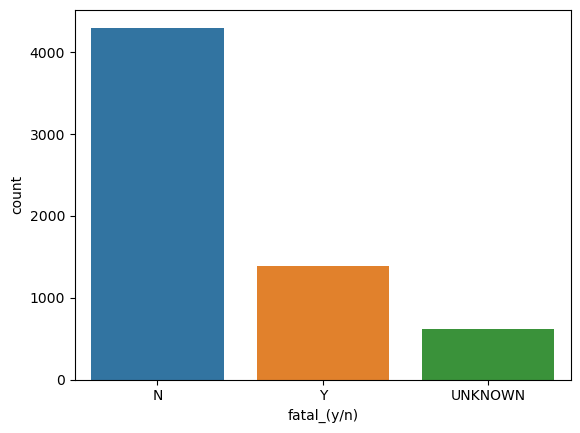

In [183]:
sns.countplot(x='fatal_(y/n)', data=df)
plt.show()

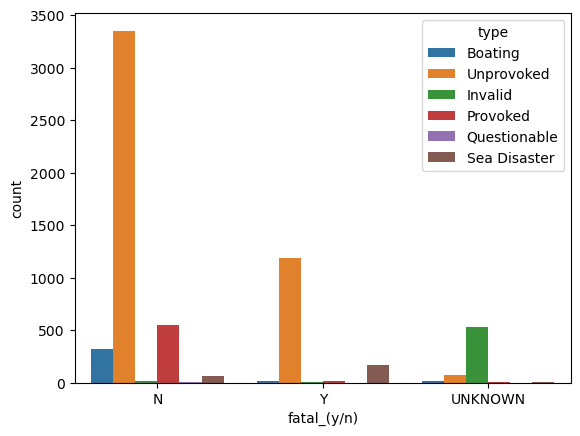

In [184]:
sns.countplot(x ="fatal_(y/n)" , hue = "type", data = df)
plt.show()

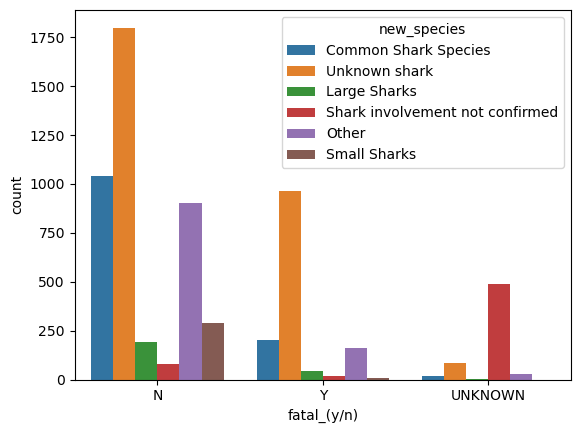

In [185]:
sns.countplot(x ="fatal_(y/n)" , hue = "new_species", data = df)
plt.show()
 

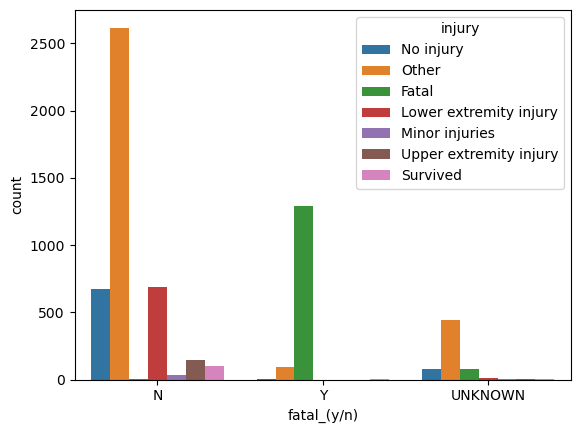

In [186]:
sns.countplot(x ="fatal_(y/n)" , hue = "injury", data = df)
plt.show()

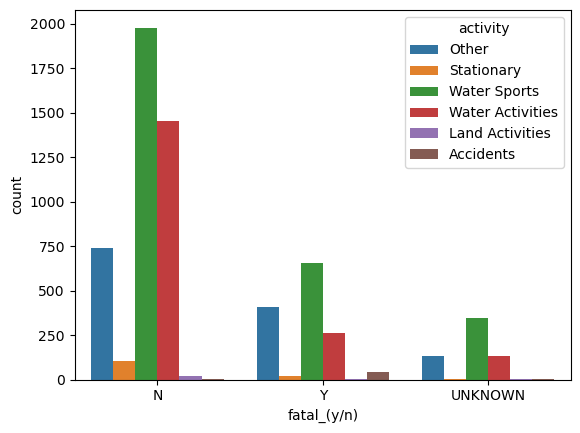

In [187]:
sns.countplot(x ="fatal_(y/n)" , hue = "activity", data = df)
plt.show()

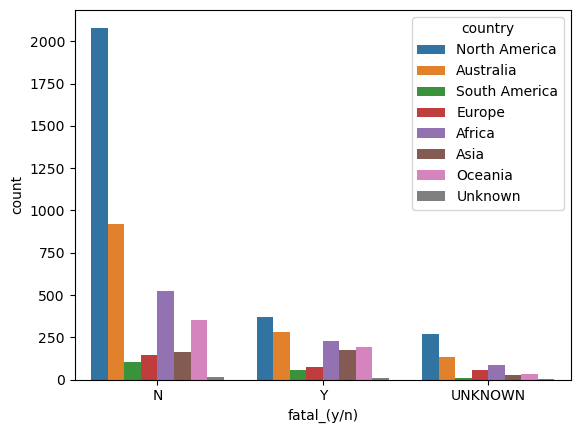

In [188]:
sns.countplot(x ="fatal_(y/n)" , hue = "country", data = df)
plt.show()

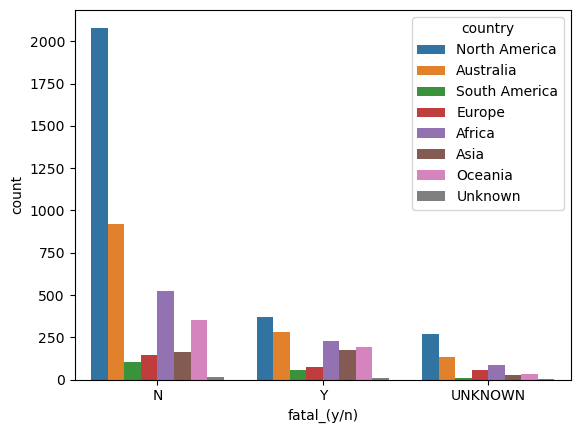

In [189]:
sns.countplot(x ="fatal_(y/n)" , hue = "country", data = df)
plt.show()

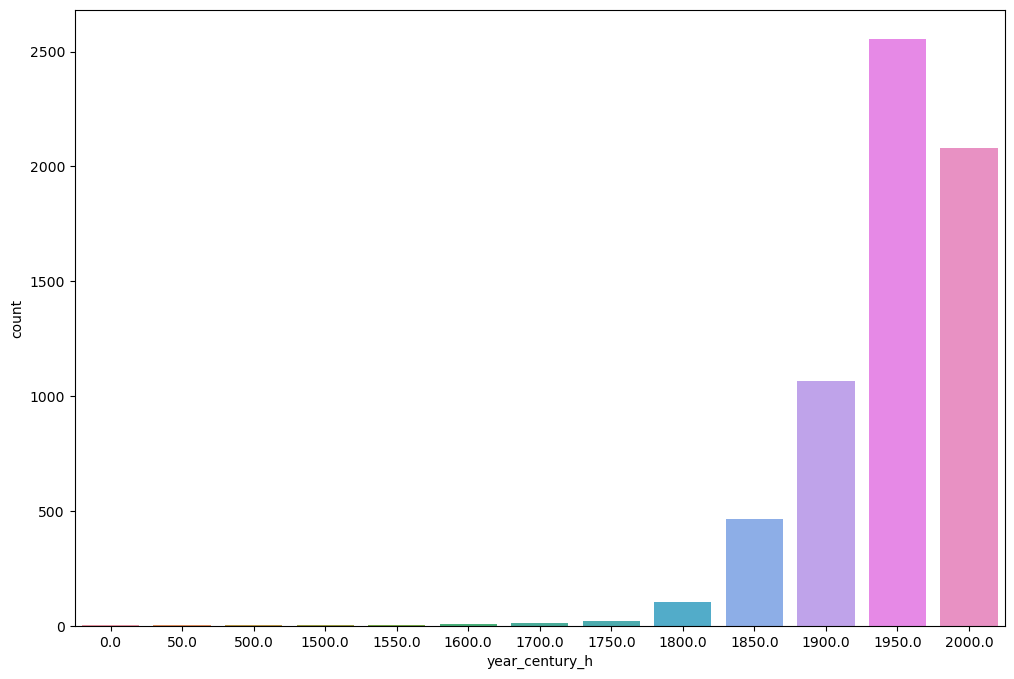

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping years into larger intervals (e.g., half of centuries)
df['year_century_h'] = df['year'] // 50 * 50  # Grouping into half of centuries
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='year_century_h')
plt.show()



In [191]:

df.drop(columns=['year_century_h'], inplace=True)

In [192]:

df['country'].fillna('North America', inplace=True)
df['country'].value_counts(dropna=False)

country
North America    2718
Australia        1338
Africa            837
Oceania           582
Asia              363
Europe            275
South America     172
Unknown            26
Name: count, dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6311 entries, 0 to 6310
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              6311 non-null   float64
 1   type              6311 non-null   object 
 2   country           6311 non-null   object 
 3   activity          6311 non-null   object 
 4   sex               6311 non-null   object 
 5   injury            6266 non-null   object 
 6   fatal_(y/n)       6311 non-null   object 
 7   new_species       6311 non-null   object 
 8   standardized_age  6311 non-null   Int64  
 9   new_time          6311 non-null   object 
dtypes: Int64(1), float64(1), object(8)
memory usage: 499.3+ KB


In [194]:
numerical = df.select_dtypes("number")
numerical

,year,standardized_age
0,2018.0,57
1,2018.0,11
2,2018.0,48
3,2018.0,24
4,2018.0,24
...,...,...
6306,1977.0,24
6307,1977.0,24
6308,1977.0,24
6309,1977.0,24


In [195]:
categorical =df.select_dtypes("object")
categorical

,type,country,activity,sex,injury,fatal_(y/n),new_species,new_time
0,Boating,North America,Other,F,No injury,N,Common Shark Species,Evening
1,Unprovoked,North America,Stationary,F,Other,N,Unknown shark,Afternoon
2,Invalid,North America,Water Sports,M,Other,N,Unknown shark,Morning
3,Unprovoked,Australia,Water Sports,M,Other,N,Large Sharks,Unknown
4,Provoked,North America,Water Activities,M,Other,N,Common Shark Species,Unknown
...,...,...,...,...,...,...,...,...
6306,Unprovoked,North America,Water Sports,M,Fatal,UNKNOWN,Unknown shark,Unknown
6307,Unprovoked,North America,Water Sports,M,Fatal,UNKNOWN,Unknown shark,Unknown
6308,Unprovoked,North America,Water Sports,M,Fatal,UNKNOWN,Unknown shark,Unknown
6309,Unprovoked,North America,Water Sports,M,Fatal,UNKNOWN,Unknown shark,Unknown


In [196]:
df['fatal_(y/n)'].value_counts()

fatal_(y/n)
N          4301
Y          1389
UNKNOWN     621
Name: count, dtype: int64

In [198]:
df['fatal_(y/n)'].replace('UNKNOWN', 'U', inplace=True)


In [202]:
df = df[df['fatal_(y/n)'].isin(['Y', 'N'])]

In [203]:
df['fatal_(y/n)'].value_counts()

fatal_(y/n)
N    4301
Y    1389
Name: count, dtype: int64

EDA

In [204]:
for col in df.select_dtypes('object'):
    
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['fatal_(y/n)'])

    # Convert the values to percentages
    row_sums = contingency_table.sum(axis=1)
    col_sums = contingency_table.sum(axis=0)
    
    contingency_table["N"] = contingency_table["N"] / contingency_table["N"].sum() * 100
    contingency_table["Y"] = contingency_table["Y"] / contingency_table["Y"].sum() * 100

    # Print the contingency table in percentage
    display(contingency_table)

fatal_(y/n),N,Y
type,,
Boating,7.416880,0.791937
Invalid,0.325506,0.575954
Provoked,12.741223,1.367891
Questionable,0.046501,0.000000
Sea Disaster,1.534527,12.095032
Unprovoked,77.935364,85.169186


fatal_(y/n),N,Y
country,,
Africa,12.159963,16.270698
Asia,3.743316,12.455004
Australia,21.413625,20.374370
Europe,3.348059,5.399568
North America,48.407347,26.565875
Oceania,8.230644,14.038877
South America,2.394792,4.175666
Unknown,0.302255,0.719942


fatal_(y/n),N,Y
activity,,
Accidents,0.139502,3.095752
Land Activities,0.511509,0.143988
Other,17.135550,29.373650
Stationary,2.394792,1.583873
Water Activities,33.806092,18.718503
Water Sports,46.012555,47.084233


fatal_(y/n),N,Y
sex,,
F,10.88119,7.703384
M,89.11881,92.296616


fatal_(y/n),N,Y
injury,,
Fatal,0.023491,93.088553
Lower extremity injury,16.208598,0.000000
Minor injuries,0.775194,0.000000
No injury,15.762274,0.071994
Other,61.475217,6.767459
Survived,2.325581,0.071994
Upper extremity injury,3.429645,0.000000


fatal_(y/n),N,Y
fatal_(y/n),,
N,100.0,0.0
Y,0.0,100.0


fatal_(y/n),N,Y
new_species,,
Common Shark Species,24.226924,14.470842
Large Sharks,4.440828,3.095752
Other,20.995117,11.447084
Shark involvement not confirmed,1.813532,1.295896
Small Sharks,6.696117,0.431965
Unknown shark,41.827482,69.258459


fatal_(y/n),N,Y
new_time,,
Afternoon,28.737503,18.502520
Evening,5.370844,3.383729
Morning,17.461056,11.519078
Night,0.767263,1.367891
Unknown,47.663334,65.226782


<Axes: xlabel='fatal_(y/n)', ylabel='standardized_age'>

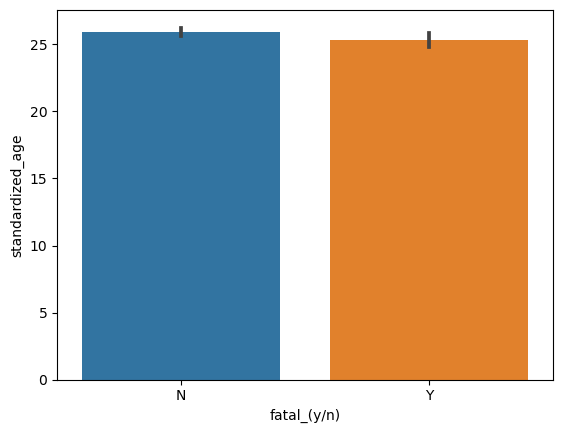

In [205]:
sns.barplot(data=df, x="fatal_(y/n)", y="standardized_age")

<Axes: xlabel='fatal_(y/n)', ylabel='year'>

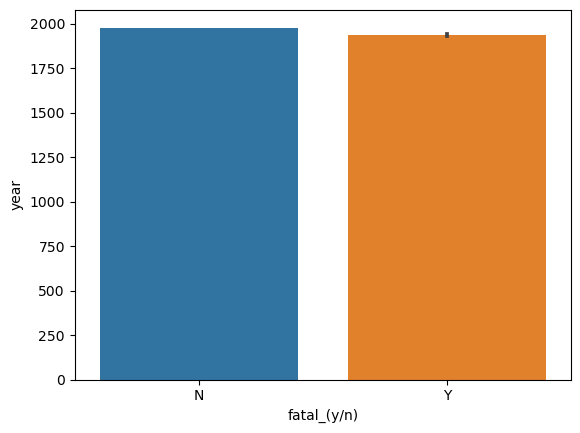

In [206]:
sns.barplot(data=df, x="fatal_(y/n)", y="year")

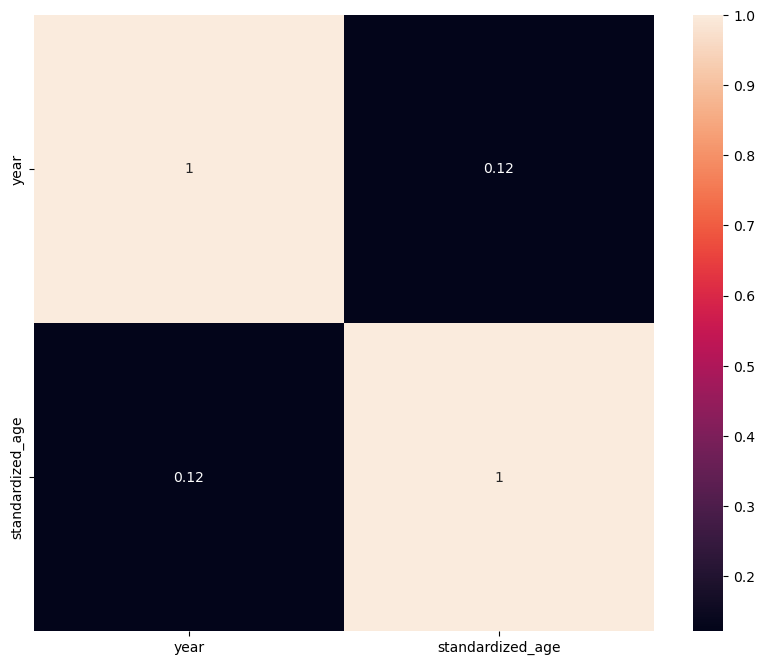

In [207]:
corr_matrix=df.corr(method='pearson', numeric_only=True)  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


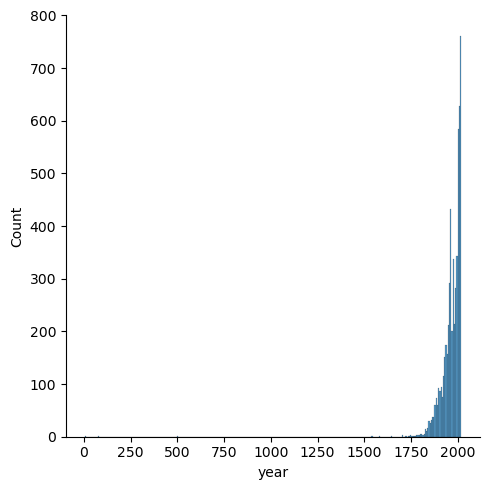

TypeError: reduction operation 'argmin' not allowed for this dtype

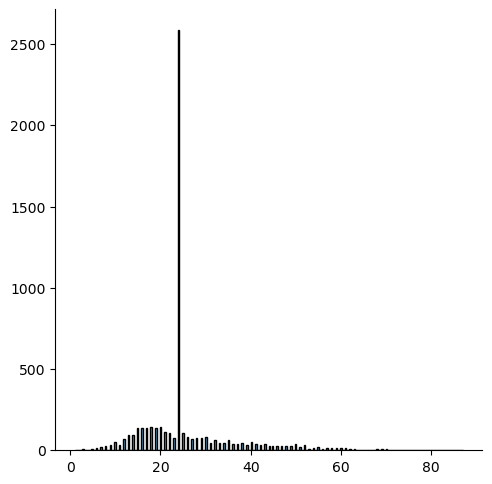

In [208]:
for col in df.select_dtypes(np.number):
    sns.displot(df[col])
    plt.show()

Data Processing

In [209]:
y = df['fatal_(y/n)']
X = df.drop('fatal_(y/n)', axis=1)

In [210]:
df.columns

Index(['year', 'type', 'country', 'activity', 'sex', 'injury', 'fatal_(y/n)',
       'new_species', 'standardized_age', 'new_time'],
      dtype='object')

In [211]:
X= pd.get_dummies(X, columns=['type','country','new_time','new_species', 'activity', 'injury', 'sex'])
X

,year,standardized_age,type_Boating,type_Invalid,type_Provoked,type_Questionable,type_Sea Disaster,type_Unprovoked,country_Africa,country_Asia,...,activity_Water Sports,injury_Fatal,injury_Lower extremity injury,injury_Minor injuries,injury_No injury,injury_Other,injury_Survived,injury_Upper extremity injury,sex_F,sex_M
0,2018.0,57,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,2018.0,11,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,2018.0,48,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
3,2018.0,24,False,False,False,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
4,2018.0,24,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,1977.0,24,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
6298,1977.0,24,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
6299,1977.0,24,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True
6300,1977.0,24,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,False,False,True


In [212]:
pd.get_dummies(df).corr()["fatal_(y/n)_N"].sort_values()

fatal_(y/n)_Y                                 -1.000000
injury_Fatal                                  -0.953735
new_species_Unknown shark                     -0.235768
type_Sea Disaster                             -0.228442
country_Asia                                  -0.159201
new_time_Unknown                              -0.151006
activity_Accidents                            -0.137436
activity_Other                                -0.131123
country_Oceania                               -0.084503
type_Unprovoked                               -0.077255
country_Africa                                -0.052228
country_South America                         -0.046135
country_Europe                                -0.045809
sex_M                                         -0.045290
country_Unknown                               -0.028278
new_time_Night                                -0.027113
type_Invalid                                  -0.017335
activity_Water Sports                         -0

In [213]:
pd.get_dummies(df).corr()["fatal_(y/n)_Y"].sort_values()

fatal_(y/n)_N                                 -1.000000
injury_Other                                  -0.465118
year                                          -0.275637
injury_Lower extremity injury                 -0.211109
injury_No injury                              -0.206695
country_North America                         -0.189470
type_Provoked                                 -0.163106
activity_Water Activities                     -0.141263
type_Boating                                  -0.121753
new_species_Small Sharks                      -0.121559
new_species_Other                             -0.105267
new_species_Common Shark Species              -0.101424
new_time_Afternoon                            -0.099936
injury_Upper extremity injury                 -0.092221
injury_Survived                               -0.072895
new_time_Morning                              -0.069605
sex_F                                         -0.045290
injury_Minor injuries                         -0

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
classification = LogisticRegression(random_state=42) #, max_iter=1000

classification.fit(X_train, y_train)

C:\Users\Tetiana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [217]:
classification.score(X_test, y_test)

0.9885764499121266

In [218]:
predictions = classification.predict(X_test)
predictions

array(['Y', 'Y', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [219]:
y_test_series = pd.Series(y_test)
value_counts = y_test_series.value_counts()

print(value_counts)

fatal_(y/n)
N    859
Y    279
Name: count, dtype: int64


In [220]:
predictions_ = classification.predict_proba(X_test)
predictions_

array([[7.28134579e-02, 9.27186542e-01],
       [6.04442933e-03, 9.93955571e-01],
       [9.98784657e-01, 1.21534322e-03],
       ...,
       [9.95073954e-01, 4.92604604e-03],
       [9.88941809e-01, 1.10581906e-02],
       [9.99286213e-01, 7.13786528e-04]])

In [221]:
confusion_matrix(y_test, predictions)

array([[852,   7],
       [  6, 273]], dtype=int64)

<Axes: >

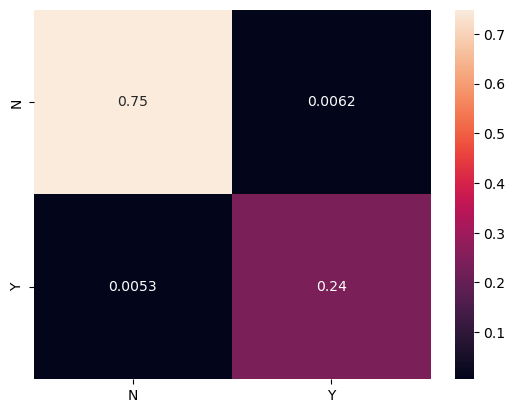

In [222]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["N", "Y"], yticklabels=["N", "Y"])

In [223]:
!pip install imblearn

In [ ]:
!pip uninstall scikit-learn --yes
!pip install scikit-learn==1.2.2
!pip uninstall imblearn
!pip install imblearn



Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Tetiana\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\Tetiana\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\Tetiana\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\Tetiana\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\Tetiana\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\Tetiana\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tetiana\anaconda3\Lib\site-pack

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


In [224]:
from imblearn.over_sampling import RandomOverSampler # remember the DOCS: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

sampler = RandomOverSampler(random_state=42)

# only sample the training data (you don't want to test on repeated or made up rows):
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train) 

y_train_balanced.value_counts()

fatal_(y/n)
N    3442
Y    3442
Name: count, dtype: int64

In [225]:
classification = LogisticRegression(random_state=42) #, max_iter=1000
classification.fit(X_train_balanced, y_train_balanced)
classification.score(X_test, y_test)

C:\Users\Tetiana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9850615114235501

<Axes: >

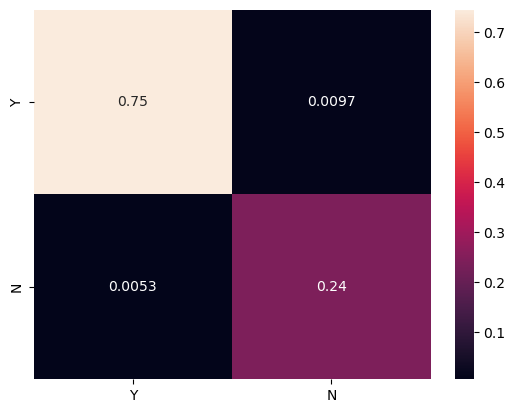

In [226]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["Y", "N"], yticklabels=["Y", "N"])